Imposing train column structure on test...
No oversampling...
No automatic feature selection...
(51884, 149) (12971, 149) (44101, 149) (7783, 149)
Searching for best parameters with CV search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.7min finished


Cross Valdiation Report:
Best Params: {'C': 0.5, 'n_jobs': 3, 'penalty': 'l1'}
Best Score: 0.811002018095


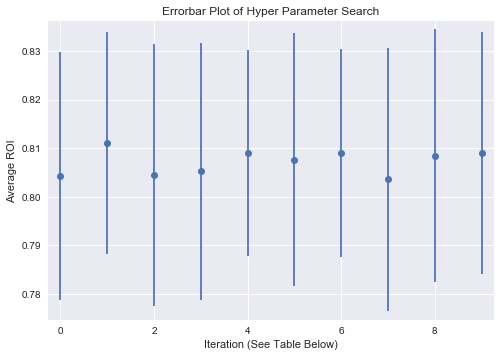

           C  n_jobs penalty
0   0.500000       3      l2
1   0.500000       3      l1
2   0.707107       3      l2
3   2.000000       3      l2
4   2.828427       3      l2
5  22.627417       3      l1
6   0.176777       3      l1
7   0.250000       3      l2
8   4.000000       3      l2
9  11.313708       3      l1
Validation Summary:
Calculate Optimal Threshold


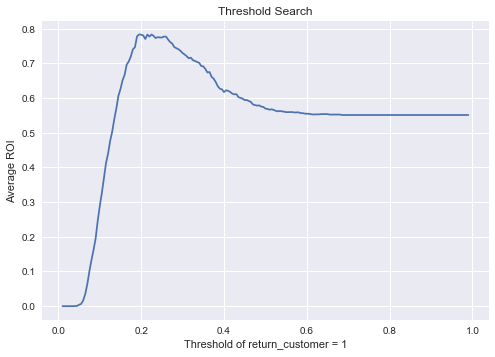

Threshold: 0.195
Average ROI: 0.783887960941
ROC Score: 0.656836583584
Validation Return Customers: 2963 of 7783 (38.07%)
[[4177 2140]
 [ 643  823]]
Testing Return Customers: 4992 of 12971 (38.49%)


In [1]:
from badsproject import BADS

#####################################
#
#  Variable Selection
#
#####################################
params_ln = {
    ######### Set Seed #########
    "rs": 90049,
    "save_model": False,

    ######### Feature Selection #########
    "manual_features_to_remove": ["x_order_date_num", "x_account_creation_date_num", 
                                  "x_deliverydate_estimated_num", "x_deliverydate_actual_num"],
    "feature_correlation_removal": False,
    "feature_correlation_threshold": 0.7,
    "automatic_feature_selection": False,
    "automatic_feature_threshold": 0.005,

    ######### Oversampling #########
    # non-standard package: http://contrib.scikit-learn.org/imbalanced-learn/index.html
    "oversample_method": "none",

    ######### Cross-Valdiation #########
    "do_cv": True, # this takes a long time
    "cv_num_folds": 5,
    "cv_validation_frac": 0.15,
    "cv_rs_iters": 10,

    ######### Model Selection #########
    "model_to_use": "linear", # "rf" or "gbc" or "linear"
}

a = BADS()
a.set_model("linear")
a.__dict__.update(params_ln)
# Load and split training  and testing data and create cross validation sets from training data
a.create_datasets(use_woe = True)
# Oversample if desired
a.oversample()
# Run algorithm-based feature selection
a.automagic_feature_selection()
# Print size of training sets
print(a.X_train.shape, a.X_test.shape, a.X_train_cv.shape, a.X_valid_cv.shape)
# Run the models
a.run_model("output/8_ln_cv.csv")

